## 学习内容

1. 相关概念（无监督学习、聚类的定义）  
2. 性能度量(外部指标、内部指标)  
3. 距离计算  
4. 原型聚类  
    K均值  
    LVQ  
    高斯混合聚类  
5. 层次聚类  
    AGNES  
    自顶而下  
6. 密度聚类  
    DBSCAN  
    其他密度聚类算法  
7. 优缺点  
8. sklearn参数详解  

### 1.相关概念
* 无监督学习：
    无监督学习是机器学习的一种方法，没有给定事先标记过的训练示例，自动对输入的数据进行分类或分群。无监督学习的主要运用包含：聚类分析、关系规则、维度缩减。它是监督式学习和强化学习等策略之外的一种选择。 一个常见的无监督学习是数据聚类。在人工神经网络中，生成对抗网络、自组织映射和适应性共振理论则是最常用的非监督式学习。
* 聚类：
    聚类是一种无监督学习。聚类是把相似的对象通过静态分类的方法分成不同的组别或者更多的子集，这样让在同一个子集中的成员对象都有相似的一些属性，常见的包括在坐标系中更加短的空间距离等。  

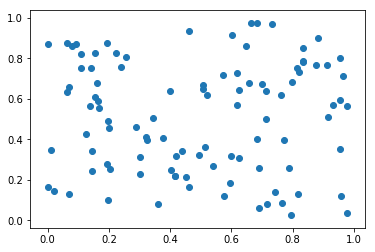

In [4]:
# 通过简单的例子来直接查看K均值聚类的效果
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# 聚类前
X = np.random.rand(100, 2)
plt.scatter(X[:, 0], X[:, 1], marker='o')

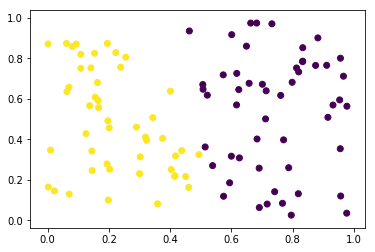

In [5]:
#聚类后
kmeans = KMeans(n_clusters=2).fit(X)
label_pred = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=label_pred)
plt.show()

### 2.性能度量
在机器学习中我们都需要对任务进行评价以便于进行下一步的优化，聚类的性能度量主要有一下两种。
* 外部指标：是指把算法得到的划分结果跟某个外部的“参考模型”（如专家给出的划分结果）比较
* 内部指标：是指直接考察聚类结果，不利用任何参考模型的指标。

### 3.距离计算
在机器学习和数据挖掘中，我们经常需要知道个体间差异的大小，进而评价个体的相似性和类别。
* 欧式距离（2-norm距离）
* 曼哈顿距离（Manhattan distance, 1-norm距离）
* 切比雪夫距离
* 闵可夫斯基距离
* 余弦相似性
* 马氏距离

欧式距离:欧氏距离是最易于理解的一种距离计算方法，源自欧氏空间中两点间的距离公式。
$$d(x,y)=\sqrt{\Sigma_{k=1}^n (x_k-y_k)^2}$$

曼哈顿距离:
曼哈顿距离也称为街区距离，计算公式如下：
$$d(x,y)=\Sigma_{k=1}^n \left|x_k-y_k\right|$$

切比雪夫距离：$$d(x,y) = \lim_{n\rightarrow \infty} (\Sigma_{k=1}^n (\left|x_k-y_k\right|)^r)^\dfrac{1}{r} = max_k (\left|x_k-y_k\right|)$$

闵可夫斯基距离:
$$d(x,y)=(\Sigma_{k=1}^n (\left|x_k-y_k\right|)^r)^\dfrac{1}{r}$$
式中，r是一个可变参数，根据参数r取值的不同，闵可夫斯基距离可以表示一类距离  
  r = 1时，为曼哈顿距离  
  r = 2时，为欧式距离  
  r →∞时，为切比雪夫距离  
闵可夫斯基距离包括欧式距离、曼哈顿距离、切比雪夫距离都假设数据各维属性的量纲和分布（期望、方差）相同，因此适用于度量独立同分布的数据对象。

马氏距离:  
$$mahalanobis(x,y)=(x-y)\Sigma^{-1}(x-y)^T$$
式中，Σ−1Σ−1是数据协方差矩阵的逆。
前面的距离度量方法大都假设样本独立同分布、数据属性之间不相关。马氏距离考虑了数据属性之间的相关性，排除了属性间相关性的干扰，而且与量纲无关。若协方差矩阵是对角阵，则马氏距离变成了标准欧式距离；若协方差矩阵是单位矩阵，各个样本向量之间独立同分布，则变成欧式距离。

### 4.原型聚类
    原型聚类亦称"基于原型的聚类" (prototype-based clustering)，此类算法假设聚类结构能通过一组原型刻画，在现实聚类任务中极为常用.通常情形下，算法先对原型进行初始化，然后对原型进行迭代更新求解.采用不同的原型表示、不同的求解方式，将产生不同的算法.
* K均值
* LVQ
* 高斯混合聚类

k均值聚类算法（k-means clustering algorithm）是一种迭代求解的聚类分析算法，其步骤是    
创建 k 个点作为起始质心（通常是随机选择）  
当任意一个点的簇分配结果发生改变时（不改变时算法结束）   
　　对数据集中的每个数据点  
　　　　对每个质心  
　　　　　　计算质心与数据点之间的距离  
　　　　将数据点分配到距其最近的簇  
　　对每一个簇, 计算簇中所有点的均值并将均值作为质心  
聚类中心以及分配给它们的对象就代表一个聚类。  

In [33]:
def distEclud(vecA, vecB):
    '''
    欧氏距离计算函数
    :param vecA:
    :param vecB:
    
    :return: float 
    '''
    dist = 0.0
    # ========= show me your code ==================
    dist = (sum((vecA - vecB)**2)) ** 0.5
    # ========= show me your code ==================
    return dist


def randCent(dataMat, k):
    '''
    为给定数据集构建一个包含K个随机质心的集合,
    随机质心必须要在整个数据集的边界之内,这可以通过找到数据集每一维的最小和最大值来完成
    然后生成0到1.0之间的随机数并通过取值范围和最小值,以便确保随机点在数据的边界之内
    :param np.dataMat:
    :param k:
    
    :return: np.dataMat
    '''
    # 获取样本数与特征值
    m, n = np.shape(dataMat)
    # 初始化质心,创建(k,n)个以零填充的矩阵
    centroids = np.mat(np.zeros((k, n)))
    print(centroids)
    
    # ========= show me your code ==================
    # 循环遍历特征值
    # here
    
    centroids[0] = dataMat[0, :]
    centroids[0] = dataMat[-1, :]
    # ========= show me your code ==================
    
    # 返回质心
    return centroids.A


def kMeans(dataMat, k, distMeas=distEclud):
    '''
    创建K个质心,然后将每个店分配到最近的质心,再重新计算质心。
    这个过程重复数次,直到数据点的簇分配结果不再改变为止
    :param dataMat: 数据集
    :param k: 簇的数目
    :param distMeans: 计算距离
    :return:
    '''
    # 获取样本数和特征数
    m, n = np.shape(dataMat)
    # 初始化一个矩阵来存储每个点的簇分配结果
    # clusterAssment包含两个列:一列记录簇索引值,第二列存储误差
    #(误差是指当前点到簇质心的距离,后面会使用该误差来评价聚类的效果)
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 创建质心,随机K个质心
    centroids = randCent(dataMat, k)

    # 初始化标志变量,用于判断迭代是否继续,如果True,则继续迭代
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # 遍历所有数据找到距离每个点最近的质心,
        # 可以通过对每个点遍历所有质心并计算点到每个质心的距离来完成
        for i in range(m):
            minDist = float("inf")
            minIndex = -1
            for j in range(k):
                # 计算数据点到质心的距离
                # 计算距离是使用distMeas参数给出的距离公式,默认距离函数是distEclud
                distJI = distMeas(centroids[j, :], dataMat[i, :])
                # 如果距离比minDist(最小距离)还小,更新minDist(最小距离)和最小质心的index(索引)
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            
            # 如果任一点的簇分配结果发生改变,则更新clusterChanged标志
            # ========= show me your code ==================
            # here
            if clusterAssment[i, 0] != minIndex: 
                clusterChanged = True
            
            # ========= show me your code ==================
            
            # 更新簇分配结果为最小质心的index(索引),minDist(最小距离)的平方
            clusterAssment[i, :] = minIndex, minDist ** 2
        # print(centroids)
        
        
        # 遍历所有质心并更新它们的取值
        # ========= show me your code ==================
        # here
        for i in range(k):
            # 通过数据过滤来获得给定簇的所有点
            new_center = dataMat[np.nonzero(clusterAssment[:, 0].A == i)[0]]
            # 计算所有点的均值,axis=0表示沿矩阵的列方向进行均值计算
            centroids[i, :] = np.mean(new_center, axis=0)

        # ========= show me your code ==================
    
    # 返回所有的类质心与点分配结果
    return centroids, clusterAssment

[[0. 0.]
 [0. 0.]]


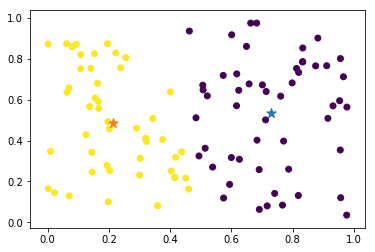

In [34]:
# 运行Kmeans，假设有两聚类中心
center,label_pred = kMeans(X, k=2)

# 将标签转化成易绘图的形式
label = label_pred [:, 0].A.reshape(-1)

# 将结果可视化
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(center[0, 0], center[0, 1], marker="*", s = 100)
plt.scatter(center[1, 0], center[1, 1], marker="*", s = 100)
plt.show()